## Notebook Imports and packabes

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 (Simple coast function)

$f(x) = x^2 + x + 1$

In [0]:
# Python function
def of(x):
  return x**2 + x + 1

In [0]:
# Make data
 x_1 = np.linspace(start=-3,stop=3,num=500)

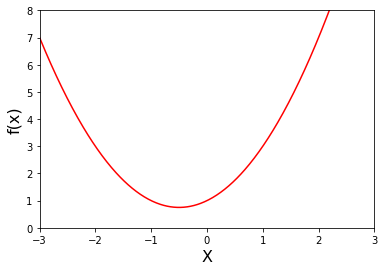

In [4]:
# Plotting
plt.plot(x_1, of(x_1), color='r')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.show()

## Slope & Derivative
$df(x)= 2x + 1$

In [0]:
# Derivative of the coast function
def df(x):
  return 2*x+1

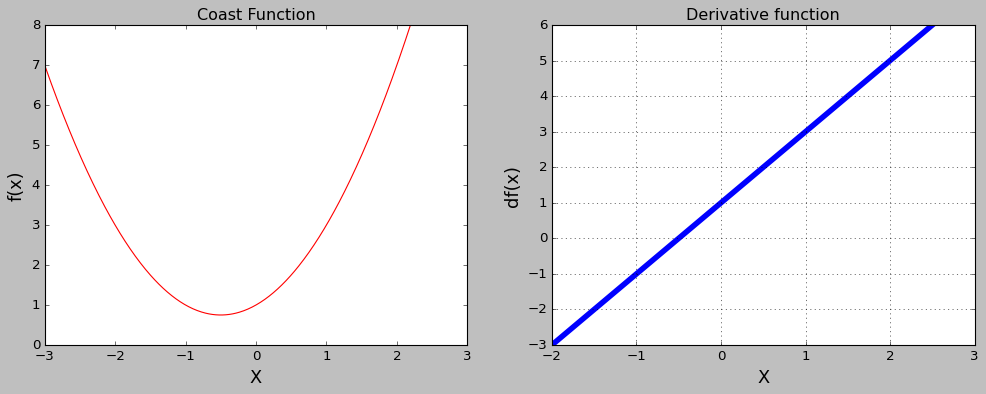

In [6]:
# Plotting and Derivatives side by side
plt.figure(figsize=(15,5))

# 1st Chart: Coast function
plt.subplot(1,2,1)
plt.title('Coast Function')
plt.plot(x_1, of(x_1), color='r')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

# 2nd Chart: Derivative function
plt.subplot(1,2,2)
plt.plot(x_1, df(x_1),linewidth=5)
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.show()

In [7]:
 x_2 = np.linspace(start=1,stop=20,num=20)
 # print(x_2)
 xfun= of(x_2)
 xdfun= df(x_2)
 print("coast function",xfun)
 print("derivative function",xdfun)

coast function [  3.   7.  13.  21.  31.  43.  57.  73.  91. 111. 133. 157. 183. 211.
 241. 273. 307. 343. 381. 421.]
derivative function [ 3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35. 37.
 39. 41.]


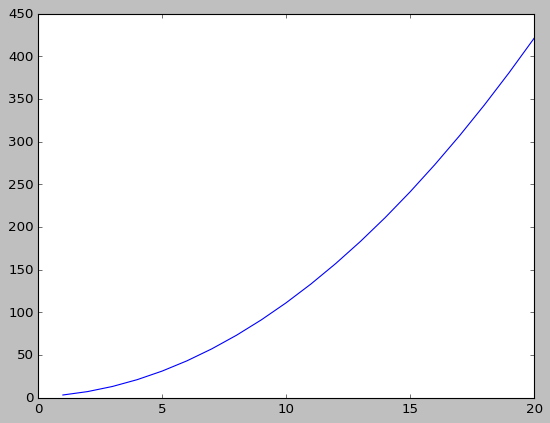

In [8]:
plt.plot(x_2,xfun)

### concave: max & convex: min

# Gradient Descent

In [9]:
step_size = 0.1
new_x = 3
prev_x = 0
precision = 0.001

x_list = []
slopList = []

for i in range(50000000):
  prev_x = new_x
  gradient = df(prev_x)      # df = 2x + 1
  new_x = prev_x - gradient * 0.1

  x_list.append(new_x)
  slopList.append(df(new_x))
  if(abs(new_x-prev_x) < precision):
    print('number of time loop running to get this precision : ',i)
    break;

print('Local Minimum occur at : ',new_x)
print('Slop or gradient at local minimum : ',df(new_x))
print('f(x) or coast function at local minimum : ', of(new_x))

number of time loop running to get this precision :  30
Local Minimum occur at :  -0.4965337678900009
Slop or gradient at local minimum :  0.006932464219998158
f(x) or coast function at local minimum :  0.7500120147650404


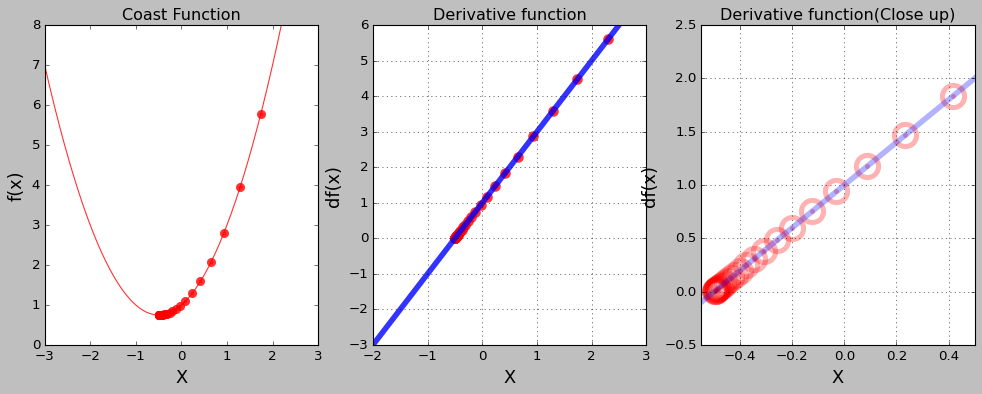

In [10]:
# Super Impose the Gradient descent Calculation Plotting
plt.figure(figsize=(15,5))
values= np.array(x_list)


# 1st Chart: Coast function
plt.subplot(1,3,1)

plt.title('Coast Function')

plt.xlim(-3,3)
plt.ylim(0,8)

#plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

plt.plot(x_1, of(x_1), color='r', alpha=0.8)
plt.scatter(values, of(values),linewidth=5, color='r', alpha= 0.8, s=10)


# 2nd Chart: Derivative function
plt.subplot(1,3,2)
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1),linewidth=5, alpha=0.8)
plt.scatter(values, slopList,linewidth=5, color='r', alpha=0.8)


# 3nd Chart: Derivative function(Close up)
plt.subplot(1,3,3)
plt.plot(x_1, df(x_1),linewidth=5, alpha=0.3)
plt.scatter(values, slopList,linewidth=20, color='r', alpha=0.3)
plt.title("Derivative function(Close up)")
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()
plt.xlim(-0.55,0.5)
plt.ylim(-0.5,2.5)


plt.show()


# Example 2: Multiple minima vs Initial Guess with Advance function
## $f(x) = x^4 + 4x^2 + 5$


In [0]:
# Define coast function and derivative function
def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

In [0]:
# Generates fake data
x_2 = np.linspace(-2,2,1000)

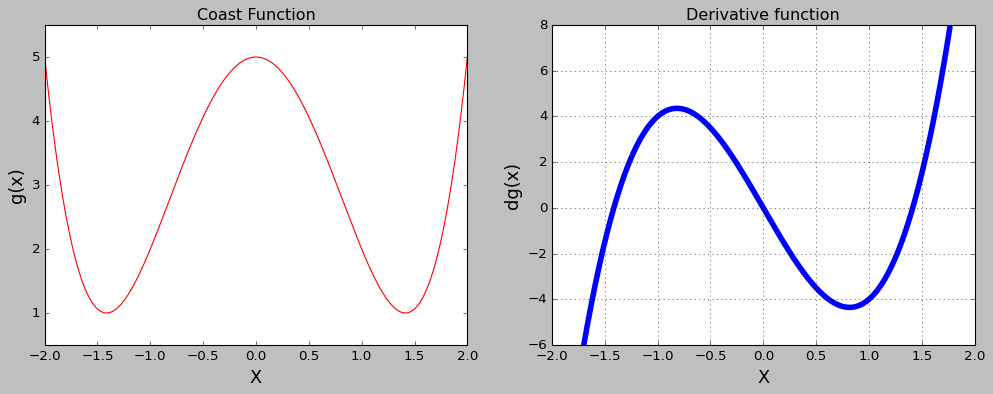

In [13]:
# Plotting and Derivatives side by side
plt.figure(figsize=(15,5))

# 1st Chart: Coast function
plt.subplot(1,2,1)
plt.title('Coast Function')
plt.plot(x_2, g(x_2), color='r')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

# 2nd Chart: Derivative function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2),linewidth=5)
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

# Gredient Descent Function

In [0]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=500):
  new_x = initial_guess
  x_list = [new_x]
  slop_list = [derivative_func(new_x)]

  for i in range(max_iter):
    prev_x = new_x
    gradient = derivative_func(prev_x)     
    new_x = prev_x - (gradient * multiplier)

    step_size = abs(new_x-prev_x)
    x_list.append(new_x)
    slop_list.append(derivative_func(new_x))
    if(step_size < precision):
      break;
  return new_x, x_list, slop_list;

In [15]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("local min occures at : ",local_min)
print("Total number of steps taken to reach local min ",len(list_x))

local min occures at :  1.4122375085019094
Total number of steps taken to reach local min  23


In [16]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5)
print("local min occures at : ",local_min)
print("Total number of steps taken to reach local min ",len(list_x))

local min occures at :  1.4122375085019094
Total number of steps taken to reach local min  23


In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= 2, multiplier= 0.01,precision= 0.0001)
print("local min occures at : ",local_min)
print("Total number of steps taken to reach local min ",len(list_x))

local min occures at :  1.4147172871957288
Total number of steps taken to reach local min  38


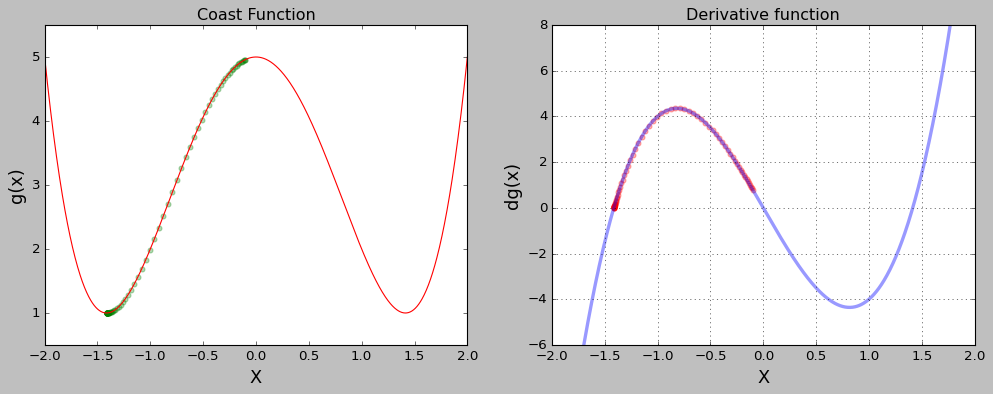

In [18]:
# Calling Gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= -0.1, multiplier= 0.01,precision= 0.0001)

# Plotting and Derivatives and Scatter side by side
plt.figure(figsize=(15,5))

# 1st Chart: Coast function
plt.subplot(1,2,1)
plt.title('Coast Function')
plt.plot(x_2, g(x_2), color='r')
plt.scatter(list_x, g(np.array(list_x)), alpha=0.3, color='green')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

# 2nd Chart: Derivative function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2),linewidth=3, alpha= 0.4)
plt.scatter(list_x, dg(np.array(list_x)), alpha=0.3, color='red')
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

# Example 3: Divergence, Overflow and Python Tuples
$$ h(x) = x^5 - 2x^4 + 2 $$

In [0]:
#Make Data
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
  return x**5 - 2*x**4 + 2
def dh(x):
  return 5*x**4 - 8*x**3
  

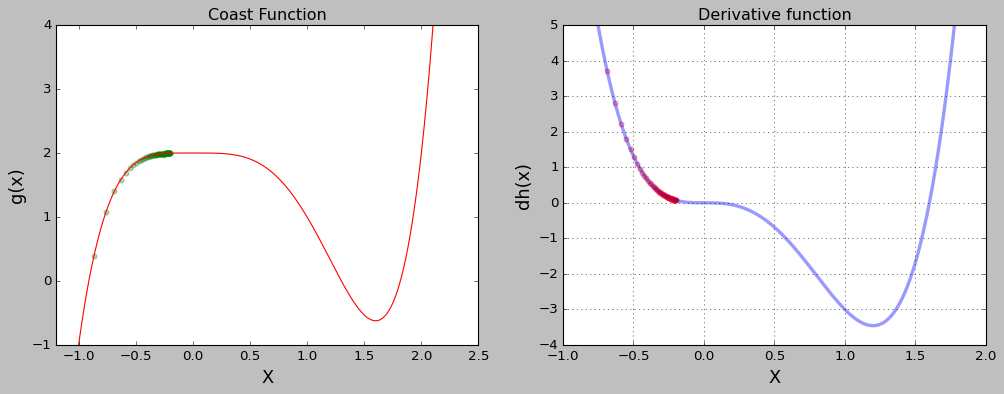

Local minimum occurs at :  -2071072.4470816324
Coast at local minimum :  -3.810455326061589e+31
Number of Steps taken :  71


In [20]:
# Calling Gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh, initial_guess= -0.2, max_iter=70)

# Plotting and Derivatives and Scatter side by side
plt.figure(figsize=(15,5))

# 1st Chart: Coast function
plt.subplot(1,2,1)
plt.title('Coast Function')
plt.plot(x_3, h(x_3), color='r')
plt.scatter(list_x, h(np.array(list_x)), alpha=0.3, color='green')
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

# 2nd Chart: Derivative function
plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3),linewidth=3, alpha= 0.4)
plt.scatter(list_x, dh(np.array(list_x)), alpha=0.3, color='red')
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.show()

print("Local minimum occurs at : ", local_min)
print("Coast at local minimum : ", h(local_min))
print("Number of Steps taken : ",len(list_x))

In [21]:
import sys
sys.float_info.max

1.7976931348623157e+308

# Learning Rate & Understanding The flaw of gradient descent algorithm

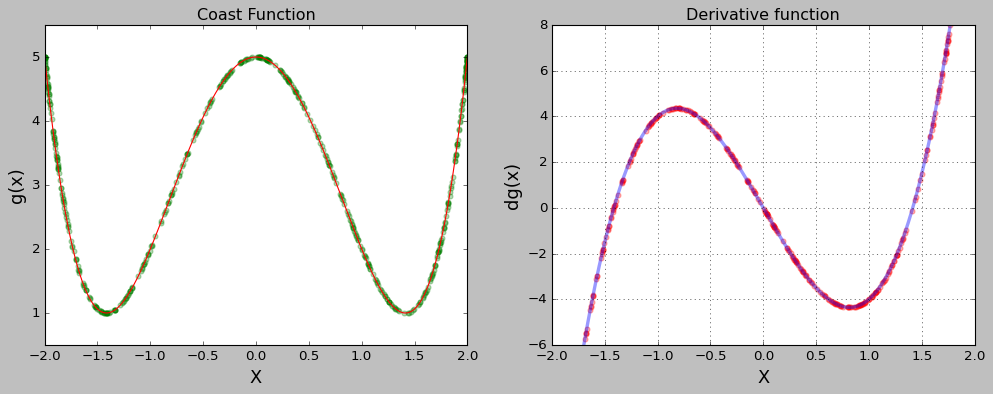

Number of iteration :  501


In [22]:
# Calling Gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, 
                          initial_guess= 0.1, multiplier=0.25,precision= 0.0001)

# Plotting and Derivatives and Scatter side by side
plt.figure(figsize=(15,5))

# 1st Chart: Coast function
plt.subplot(1,2,1)
plt.title('Coast Function')
plt.plot(x_2, g(x_2), color='r')
plt.scatter(list_x, g(np.array(list_x)), alpha=0.3, color='green')
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.style.use('classic')
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

# 2nd Chart: Derivative function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2),linewidth=3, alpha= 0.4)
plt.scatter(list_x, dg(np.array(list_x)), alpha=0.3, color='red')
plt.title("Derivative function")
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

print("Number of iteration : ", len(list_x))

## Run Gredient Descent 3 times

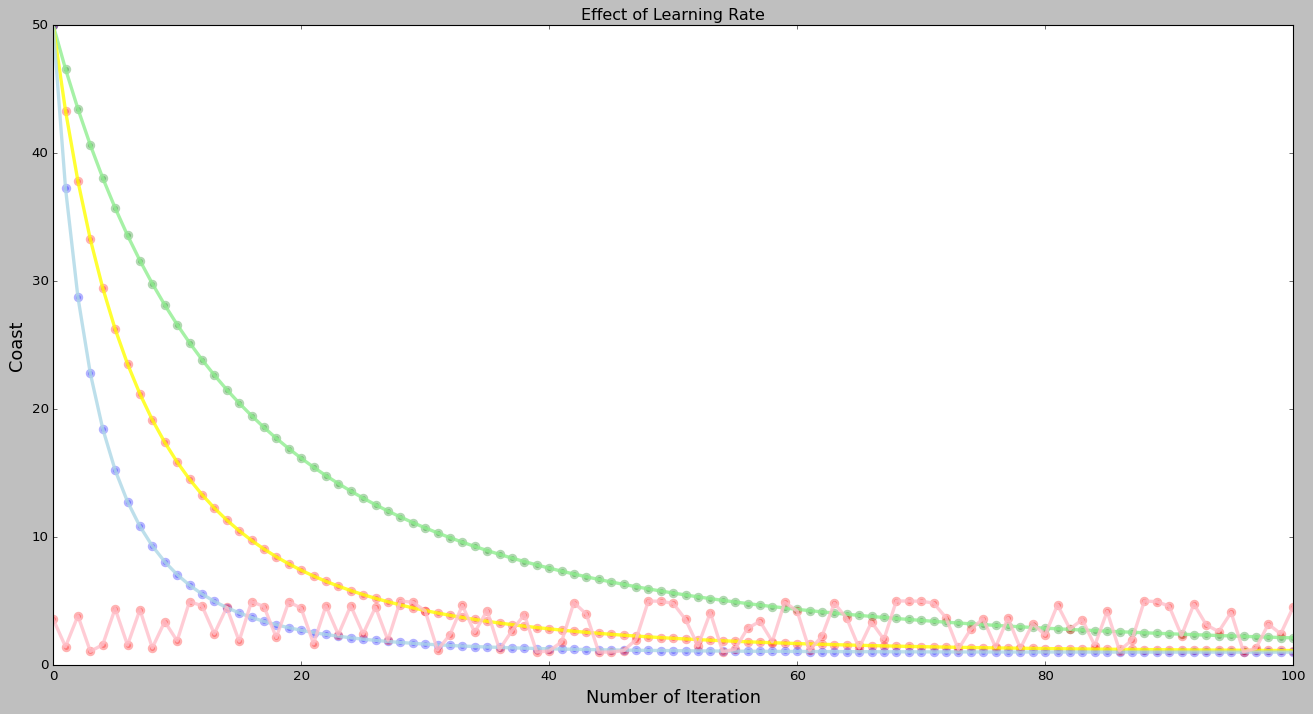

In [23]:
# Calling Gradient descent
n=100
low_gamma = gradient_descent(derivative_func= dg, 
                          initial_guess= 3, multiplier=0.0005,precision= 0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func= dg, 
                          initial_guess= 3, multiplier=0.001,precision= 0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func= dg, 
                          initial_guess= 3, multiplier=0.002,precision= 0.0001, max_iter=n)

insane_gamma = gradient_descent(derivative_func= dg, 
                          initial_guess= 1.9, multiplier=0.25,precision= 0.0001, max_iter=n)

plt.figure(figsize=(20,10))

# 1st Chart: Effect of Learning Rate
plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of Learning Rate')
plt.style.use('classic')
plt.xlabel('Number of Iteration',fontsize=16)
plt.ylabel('Coast',fontsize=16)

# values for the chart
iteration_list = list(range(0,n+1))

# plotting low learning rate
plt.plot(iteration_list, g(np.array(low_gamma[1])), color='lightgreen', linewidth=3, alpha= 0.8)
plt.scatter(iteration_list, g(np.array(low_gamma[1])), alpha=0.3, color='green', linewidths=4)

# plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='yellow', linewidth=3, alpha= 0.8)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), alpha=0.3, color='red', linewidths=4)

# plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='lightblue', linewidth=3, alpha= 0.8)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), alpha=0.3, color='blue', linewidths=4)

# plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='pink', linewidth=3, alpha= 0.8)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), alpha=0.3, color='red', linewidths=4)

plt.show()


# Example 4 With 3D data visualization

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} +1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [0]:
def f(x,y):
  r= 3**(-x**2 -y**2)
  return 1/(r+1)

In [25]:
# make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print("shape of the data: ",x_4.shape)

# changing our 1d data to 2d data
x_4, y_4 = np.meshgrid(x_4, y_4)

print("shape of the data after converting: ",x_4.shape)


shape of the data:  (200,)
shape of the data after converting:  (200, 200)


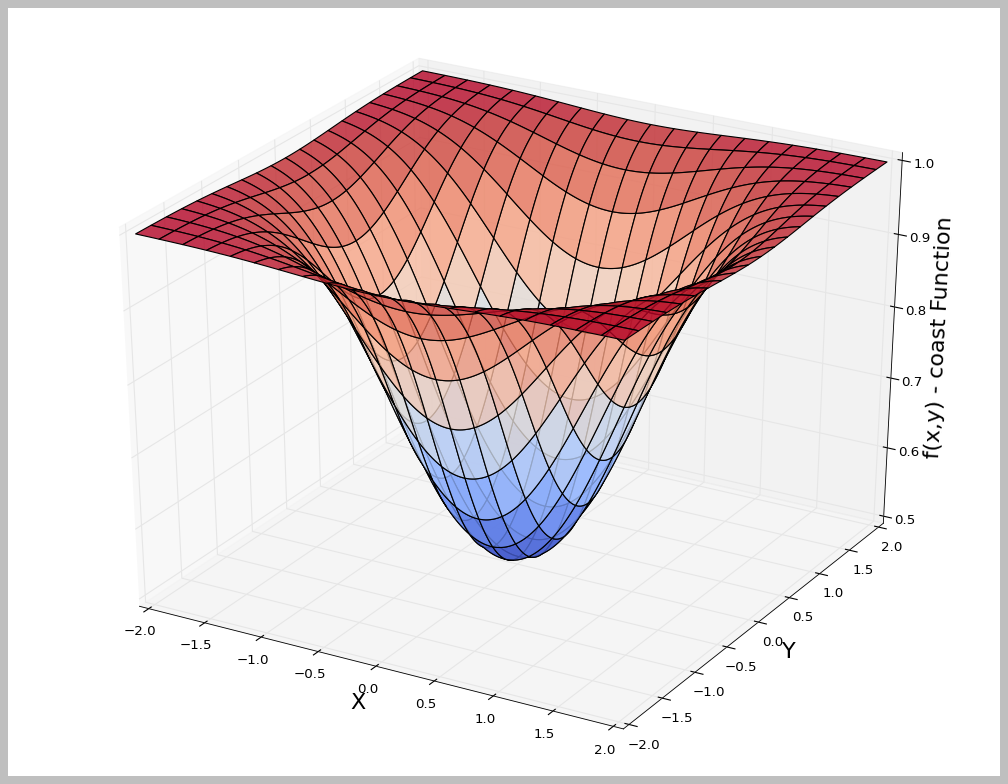

In [26]:
# 3d Chart
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')

ax.set_xlabel("X",fontsize=20)
ax.set_ylabel("Y",fontsize=20)
ax.set_zlabel("f(x,y) - coast Function",fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.8)

plt.show()

# Partial Derivatives and Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3)\cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3)\cdot 3^{-x^2 -y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [27]:
a, b = symbols('x, y')
print("our coast func: ",f(a,b))
print("Partial derivation wrt x : ",diff(f(a,b), a))
print("Partial derivation wrt y : ",diff(f(a,b), b))

our coast func:  1/(3**(-x**2 - y**2) + 1)
Partial derivation wrt x :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivation wrt y :  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [28]:
print("value of f(x,y) at x= 1.8 and y=1 : ",f(a,b).evalf(subs= {a:1.8,b:1}) )# Python Dictionary {a:1.8,b:1} key value pair
print("Value of partial derivatives wrt x : ",diff(f(a,b),a).evalf(subs= {a:1.8,b:1}))

value of f(x,y) at x= 1.8 and y=1 :  0.990604794032582
Value of partial derivatives wrt x :  0.0368089716197505


# Batch Gradient Descent with sympy

In [29]:
# setup
multiplier= 0.1
max_iter= 200
param = np.array([1.8,1.0]) # initial guess

for n in range(max_iter):
  gradient_x= diff(f(a,b),a).evalf(subs={a:param[0],b:param[1]}) 
  gradient_y= diff(f(a,b),b).evalf(subs={a:param[0],b:param[1]})  
  gradients = np.array([gradient_x,gradient_y])

  param= param- multiplier* gradients

print("minimum in gradient array", gradients)
print("minimum occurest at x value of : ",gradients[0])
print("minimum occurest at y value of : ",gradients[1])
print("Coast function : ",f(gradients[0],gradients[1]))


minimum in gradient array [0.000461440542096373 0.000256355856720208]
minimum occurest at x value of :  0.000461440542096373
minimum occurest at y value of :  0.000256355856720208
Coast function :  0.500000076530897


In [0]:
# Partial derivation function for example 4
def pdx(x,y):
  r= 3**(-x**2-y**2)
  return 2*x*log(3)*r / (r+1)**2
def pdy(x,y):
  r= 3**(-x**2-y**2)
  return 2*y*log(3)*r / (r+1)**2

In [31]:
pdx(1.8,1)

0.036808971619750504

# Graphing 3d Gredient Descent & adv numpy array 

In [32]:
 # setup
multiplier= 0.1
max_iter= 200
param = np.array([1.8,1.0]) # initial guess
print(param.shape)
values_array=param.reshape(1,2)
print(values_array.shape)


for n in range(max_iter):
  gradient_x= pdx(param[0],param[1])
  gradient_y= pdy(param[0],param[1])
  gradients = np.array([gradient_x,gradient_y])

  param= param - multiplier* gradients

  #values_array= np.append(values_array, param.reshape(1,2), axis=0)
  values_array= np.concatenate((values_array,param.reshape(1,2)), axis=0) #axis = 0 everytime new row will be added
  
  

print("minimum in gradient array", gradients)
print("minimum occurest at x value of : ",gradients[0])
print("minimum occurest at y value of : ",gradients[1])
print("Coast function : ",f(gradients[0],gradients[1]))


(2,)
(1, 2)
minimum in gradient array [0.00046144 0.00025636]
minimum occurest at x value of :  0.0004614405420963725
minimum occurest at y value of :  0.00025635585672020665
Coast function :  0.5000000765308974


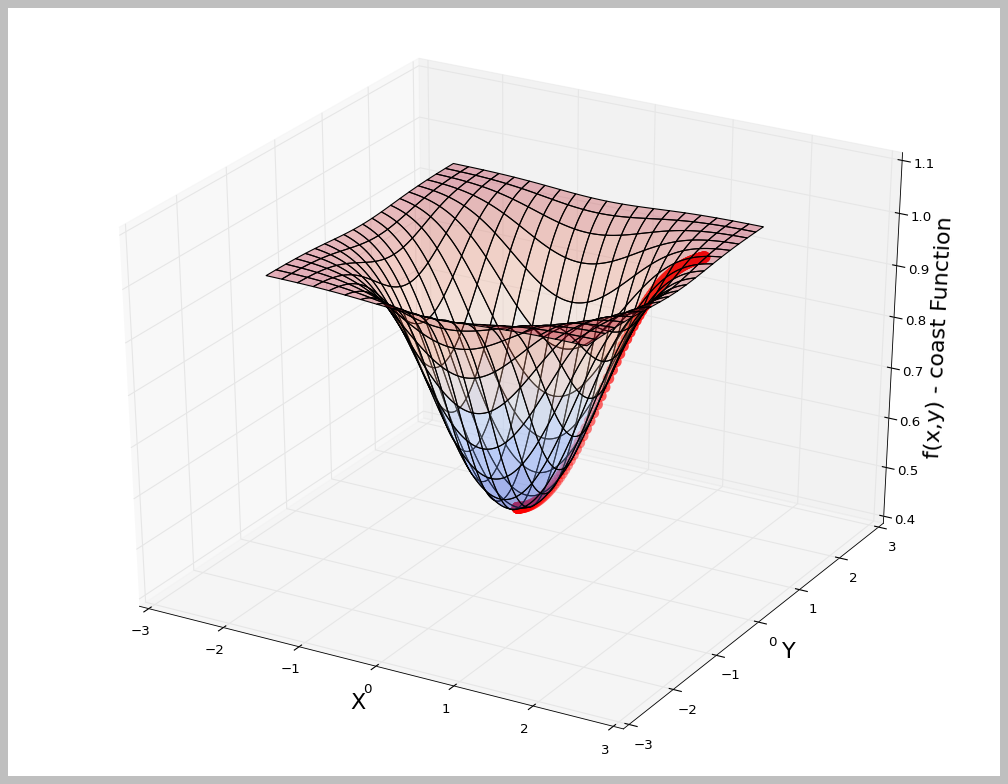

In [33]:
# 3d Chart
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')

ax.set_xlabel("X",fontsize=20)
ax.set_ylabel("Y",fontsize=20)
ax.set_zlabel("f(x,y) - coast Function",fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.coolwarm, alpha=0.3)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]), color='red', linewidth=6)

plt.show()

# Working with data and Real coast function
## Mean square error: a coast function for regression Problem.
### $$ RSS = \sum_{i=1}^{n} \big(y ^{(i)}- h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y ^{(i)}- h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y ^{(i)}- \hat{y}  \big)^2 $$

In [34]:
# Make sample data
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([[1.7,2.4,3.5,3.0,6.1,9.4,8.2]]).transpose()

print("shape of x_5",x_5.shape)
print("shape of y_5",y_5.shape)


shape of x_5 (7, 1)
shape of y_5 (7, 1)


In [35]:
#Quick Liner regression
regr= LinearRegression()
regr.fit(x_5,y_5)
print("Theta 0 : ",regr.intercept_[0])
print("Theta 1 : ",regr.coef_[0][0])

Theta 0 :  0.8475351486029545
Theta 1 :  1.2227264637835913


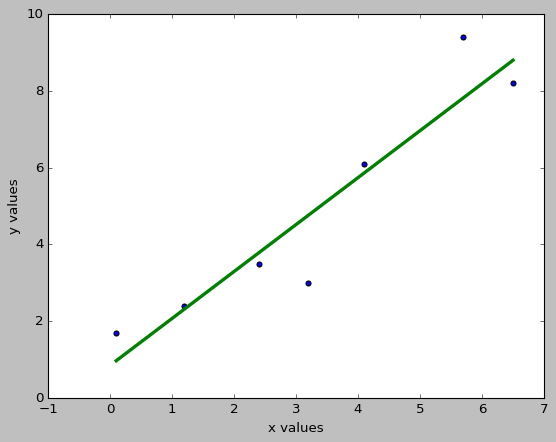

In [36]:
 # Ploting
 plt.scatter(x_5,y_5)
 plt.plot(x_5,regr.predict(x_5), color='green', linewidth=3)
 plt.xlabel("x values")
 plt.ylabel("y values")
 plt.show() 

In [37]:
#MSE
#y_hat=   0.8475351486029545 + 1.2227264637835913 * x_5
y_hat = regr.predict(x_5)
print("Est values of y :\n ",y_hat)
print("In comparision : \n",y_5)

Est values of y :
  [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision : 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [0]:
def mse(y, y_hat):
  #mse_calc = (1/y.size) * sum((y-y_hat)**2)
  mse_calc = np.average((y-y_hat)**2, axis=0)
  return mse_calc

In [39]:
print("manually calculated MSE: ",mse(y_5,y_hat)[0])
print("MSE is : ", mean_squared_error(y_5, regr.predict(x_5)))

manually calculated MSE:  0.9479655759794577
MSE is :  0.9479655759794577


# 3D plot of MSE function 
## Make data


In [40]:
np_that= 200
thata_0= np.linspace(start= -1, stop=3, num=np_that)
thata_1= np.linspace(start= -1, stop=3, num=np_that)
plot_t0, plot_t1= np.meshgrid(thata_0, thata_1)
print(plot_t0.shape)

(200, 200)


In [41]:
# plot MSE on 3d
plot_cost = np.zeros((np_that,np_that))

for i in range(np_that):
  for j in range(np_that):
    y_hat= plot_t0[i][j] + plot_t1[i][j] * x_5
    plot_cost[i][j] = mse(y_5,y_hat)
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

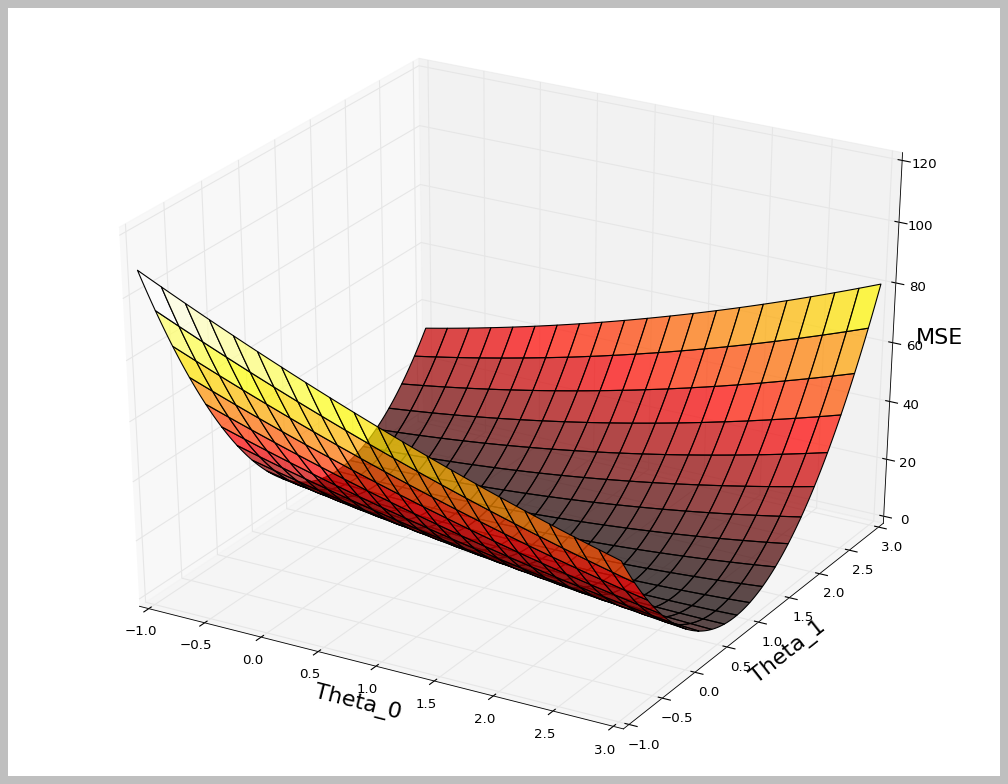

In [42]:
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')
ax.set_xlabel("Theta_0", fontsize=20) 
ax.set_ylabel("Theta_1", fontsize=20) 
ax.set_zlabel("MSE", fontsize=20) 

ax.plot_surface(plot_t0,plot_t1,plot_cost, alpha= 0.7, cmap=cm.hot)
plt.show()

In [43]:
print("min value of plot function ", plot_cost.min())
ij_min= np.unravel_index(indices= plot_cost.argmin(),dims= plot_cost.shape)
print(ij_min)

min value of plot function  0.9483826526747164
(111, 91)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


## Partial derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)}\big) $$

# MSE and Gred desc


In [0]:
def grad(x, y, thetas):
  n = y.size

  theta0_slope= (-2/n) * sum(y-thetas[0]-thetas[1]*x)
  theta1_slope= (-2/n) * sum((y-thetas[0]-thetas[1]*x)*x)
  return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [45]:
multipler= 0.01
thetas= np.array([2.9,2.9])

plot_vals= thetas.reshape(1,2)
mse_vals= mse(y_5,thetas[0]+thetas[1]*x_5)

for i in range(1000):
  thetas = thetas - multipler * grad(x_5,y_5,thetas)
  plot_vals= np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
  mse_vals= np.concatenate((mse_vals,mse(y_5, thetas[0]+thetas[1]*x_5)))

print("Min occures at theta_0",thetas[0])
print("Min occures at theta_1",thetas[1])
print("MSE is : ",mse(y_5, thetas[0]+ thetas[1]*x_5))

Min occures at theta_0 0.8532230461743415
Min occures at theta_1 1.2214935332607393
MSE is :  [0.94797511]


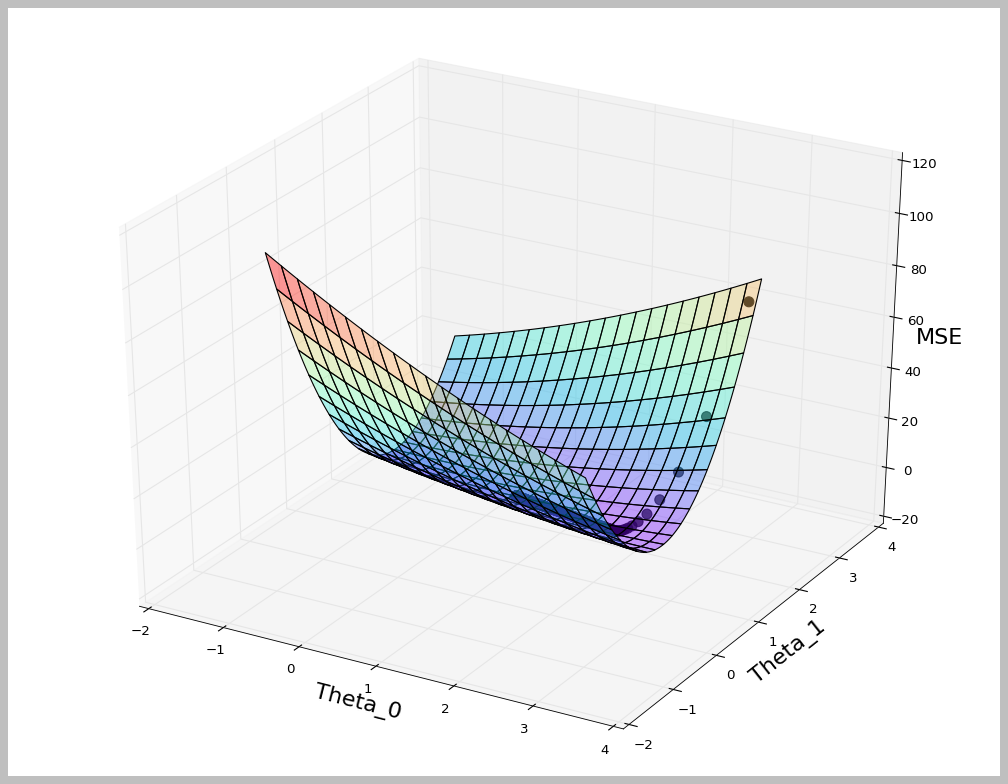

In [46]:
fig= plt.figure(figsize=[16,12])
ax= fig.gca(projection='3d')
ax.set_xlabel("Theta_0", fontsize=20) 
ax.set_ylabel("Theta_1", fontsize=20) 
ax.set_zlabel("MSE", fontsize=20) 
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80, color='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost, alpha= 0.4, cmap=cm.rainbow)
plt.show()